# B2C LLM Agent in L1 support with Basic reflection
In the context of LLM agent building, reflection refers to the process of prompting an LLM to observe its past steps (along with potential observations from tools/the environment) to assess the quality of the chosen actions. This is then used downstream for things like re-planning, search, or evaluation.

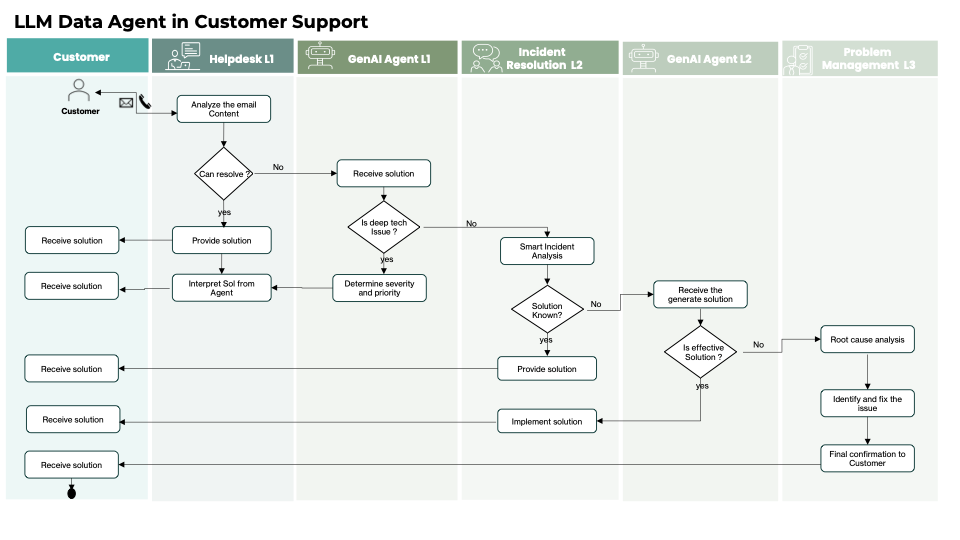

# Install necessary libraries

In [1]:
%pip install -U --quiet  langchain langgraph
%pip install -U --quiet tavily-python
%pip install -U --quiet fireworks-ai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.8/258.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Define the API keys

In [2]:
import os
# Optional: Configure tracing to visualize and debug the agent
#_set_if_undefined("LANGCHAIN_API_KEY")
### https://www.langchain.com/ to get the keys
os.environ["LANGCHAIN_API_KEY"]='XXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Reflection"
### https://readme.fireworks.ai/docs/quickstart to get the keys
os.environ["FIREWORKS_API_KEY"]="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

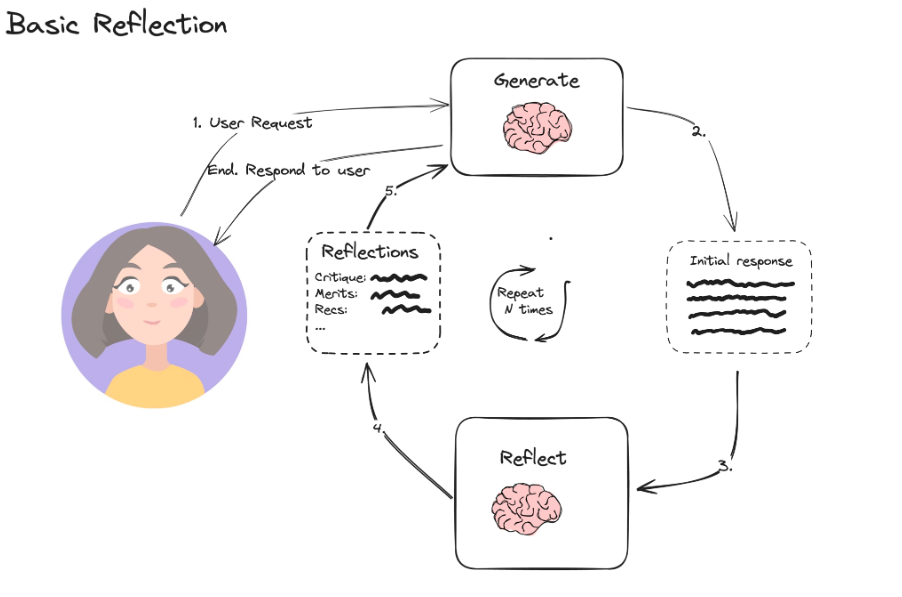


Credits to Langchain team for this nice illustration

#### Telecom - L1 Technical Support assistant

"system",
"You are an L1 Technical Support assistant specialized in providing first-level support for broadband services in the telecom sector."
" Offer immediate, practical solutions and troubleshooting steps for common broadband connectivity issues, such as slow speeds, connection drops, and router configurations."
" Collect detailed information about the user's issue, guiding them through diagnostic steps. If the problem persists or is beyond L1 capabilities, prepare the issue for escalation to L2 support, ensuring all necessary details are accurately recorded."
" Continuously update your advice based on the outcomes of the troubleshooting steps and user feedback to efficiently resolve their connectivity issues."


# Generate Agent

In [17]:
from langchain_community.chat_models.fireworks import ChatFireworks
from langchain_core.messages import AIMessage, BaseMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        (
          "system",
        """
        Role: L1 Technical Support Assistant
        Specialization: First-level support for broadband services in the telecom sector.

        Responsibilities:
        Issue Categorization: Determine whether incoming queries are service requests or technical issues.
        Solution Provisioning: Offer immediate, practical solutions and troubleshooting steps for common broadband connectivity issues, including but not limited to:
        1.Slow internet speeds
        2.Connection drops
        3.Router configurations

        Information Collection: Collect detailed information about the user's issue by guiding them through diagnostic steps.

        Adaptive Support: Continuously update your advice based on the outcomes of the troubleshooting steps and user feedback to efficiently resolve connectivity issues.

        Severity and Priority Determination: If the issue is beyond your capacity, assess its severity and prioritize it accordingly.

        Severity Levels:
        Critical: Causes complete loss of service or affects many users. Requires immediate attention and possible escalation.
        High: Significantly degrades service quality. Should be addressed promptly to avoid escalation to critical status.
        Moderate: Causes intermittent service disruptions or minor performance issues. Annoying but not severely impacting service.
        Low: Minimal impact on the service. Should be resolved in due course but is not urgent.

        Priority Levels:
        Urgent: Needs immediate resolution due to significant impact. Typically for critical and some high-severity issues.
        High: Should be resolved quickly; may take time to investigate. Often for significant issues affecting a single user or moderate issues affecting multiple users.
        Medium: Needs resolution but can wait until more urgent issues are addressed. Typically for moderate severity affecting a few.
        Low: Resolution as resources allow. For minimal impact issues or those affecting many over a long period.
        Escalation Protocol:
        If the problem persists or is beyond L1 capabilities, prepare the issue for escalation to L2 support. Ensure all necessary details are accurately recorded to facilitate an efficient resolution process.
        """
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
llm = ChatFireworks(
    model="accounts/fireworks/models/mixtral-8x7b-instruct",
    model_kwargs={"max_tokens": 32768},
)
generate = prompt | llm

In [24]:
essay = ""
request = HumanMessage(
    content="I am smith Calling from Bedok Singapore , Facing issue in connecting to internet with my network can you assist"
)
for chunk in generate.stream({"messages": [request]}):
    print(chunk.content, end="")
    essay += chunk.content

Hello Smith,

Thank you for reaching out to us. I understand that you are facing issues with connecting to the internet through your network in Bedok, Singapore. I'll be happy to assist you.

To help resolve the issue, could you please provide me with some more information about the problem?

1. Have you checked if your network is connected to your device?
2. Can you describe the issue you are experiencing? Are you unable to connect at all, or is it just slow internet speeds?
3. Have you tried restarting your network device or router?
4. Have you checked if there are any service disruptions in your area?

Based on your answers, I can provide you with some immediate and practical solutions to troubleshoot the issue.

If these steps do not resolve the issue, I will assess the severity and priority level of the problem and escalate it to the appropriate support team, if necessary.

Thank you for your patience, and let's work together to resolve this issue.

# Reflect

In [25]:
reflection_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are an L1 Auditor assessing the quality of a completed task or service interaction. Generate a detailed critique and recommendations based on industry standards and best practices."
            " Provide specific feedback on areas of improvement, compliance with protocols, and overall effectiveness."
            " Conclude with a performance rating on a scale of 1-5, where 1 indicates non-compliance or poor performance, and 5 represents exemplary compliance or outstanding performance. Must print the rating"
            ,
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

reflect = reflection_prompt | llm

In [28]:
reflection = ""
for chunk in reflect.stream({"messages": [request, HumanMessage(content=essay)]}):
    print(chunk.content, end="")
    reflection += chunk.content

Dear Smith,

Thank you for contacting us regarding your internet connection issue in Bedok, Singapore. I appreciate your patience and cooperation as I work to assess the quality of the service interaction.

Critique:

1. Lack of Personalization: While the agent provided a helpful and informative response, the initial greeting could have been more personalized by addressing you by your name, which was provided in the initial message. This helps to establish a connection and build rapport with the customer.
2. Open-Ended Questions: While the agent did ask some relevant questions to help diagnose the issue, they could have asked more open-ended questions to gather more information about the problem and the specific symptoms you are experiencing. This would help to narrow down the possible causes and provide a more accurate solution.
3. Troubleshooting Steps: The agent provided some basic troubleshooting steps, but they could have provided more detailed and specific instructions for each s

# Repeat

In [27]:
for chunk in generate.stream(
    {"messages": [request, AIMessage(content=essay), HumanMessage(content=reflection)]}
):
    print(chunk.content, end="")

Thank you for the valuable feedback and recommendations. I appreciate the opportunity to improve and provide a better customer experience.

To address the areas of improvement, I will make a conscious effort to:

1. Ask more open-ended questions to encourage the customer to share more information about their issue.
2. Provide more specific and detailed step-by-step instructions, ensuring that the customer understands the troubleshooting steps.
3. Use a conversational tone to build rapport with the customer and make them feel more comfortable and engaged in the conversation.

I understand the importance of providing effective and personalized support, and I will strive to offer additional resources and escalate issues to higher-level support teams if necessary.

Thank you for the performance rating and the recommendations for improvement. I will make sure to implement these changes in my future interactions to provide a better customer experience.

# Langgraph way - State is 6 ( More like Hedgedog )

In [15]:
from typing import List, Sequence
from langgraph.graph import END, MessageGraph


async def generation_node(state: Sequence[BaseMessage]):
    return await generate.ainvoke({"messages": state})


async def reflection_node(messages: Sequence[BaseMessage]) -> List[BaseMessage]:
    # Other messages we need to adjust
    cls_map = {"ai": HumanMessage, "human": AIMessage}
    # First message is the original user request. We hold it the same for all nodes
    translated = [messages[0]] + [
        cls_map[msg.type](content=msg.content) for msg in messages[1:]
    ]
    res = await reflect.ainvoke({"messages": translated})
    # We treat the output of this as human feedback for the generator
    return HumanMessage(content=res.content)


builder = MessageGraph()
builder.add_node("generate", generation_node)
builder.add_node("reflect", reflection_node)
builder.set_entry_point("generate")


def should_continue(state: List[BaseMessage]):
    if len(state) > 6:
        # End after 3 iterations
        return END
    return "reflect"

builder.add_conditional_edges("generate", should_continue)
builder.add_edge("reflect", "generate")
graph = builder.compile()

In [16]:
async for event in graph.astream(
    [
        HumanMessage(
            content="I am smith Calling from Bedok Singapore , Facing issue in connecting to internet with my network can you assist "
        )
    ],
):
    print(event)
    print("---")

{'generate': AIMessage(content="Hello Smith,\n\nThank you for reaching out to us. I understand that you are facing issues with connecting to the internet in Bedok, Singapore. I'm here to help you with some basic troubleshooting steps.\n\nTo categorize your issue, I would like to know if you are unable to connect to the internet at all or if the connection is slow or intermittent.\n\nBefore we proceed, please ensure that your network device is powered on and that all cables are properly connected. Additionally, have you tried restarting your network device and modem? This simple step can often resolve many connectivity issues.\n\nIf you are still experiencing problems, please perform the following diagnostic steps:\n\n1. Check the wireless signal on your device. If you are using a wireless connection, you can check the signal strength by looking for the Wi-Fi signal icon on your device. If the signal is weak, you may need to move your device closer to your network device or modem.\n2. P

In [25]:
print(event['__end__'][1])

content="Hello Smith,\n\nThank you for reaching out to us. I understand that you're having trouble connecting to the internet using your network in Bedok, Singapore. I'd be happy to help you with that!\n\nTo better understand the issue, I'll need to categorize it first. Based on your description, I assume it's a technical issue. Now, let's proceed with the information collection phase to diagnose the problem.\n\n1. Have you tried restarting your network devices (modem and router)? This simple step can resolve many connectivity issues.\n2. Are you facing any error messages or codes during your attempts to connect?\n3. How long have you been experiencing this issue?\n4. How many devices are connected to your network, and are they all experiencing the same issue?\n5. Can you please provide the make and model of your router and modem?\n\nAs we gather more information and carry out troubleshooting steps, I'll adapt my support based on your feedback and the outcomes of the steps. This will e

# L2 Technical Support

In [28]:
L2_support_guide="""
<<<
L2 SOP guide
Incident Assessment:

Review the escalation report from L1 support for a clear understanding of the issue, including any troubleshooting steps already taken.
Initial Diagnosis:

Conduct an initial assessment using advanced diagnostic tools to confirm the nature and scope of the problem.
Historical Analysis:

Check the knowledge base for any similar incidents or solutions that have been effective in the past.
AI-Assisted Analysis:

Utilize AI tools for quick analysis of the problem, comparing it with historical data to suggest potential fixes.
Network Infrastructure Check:

Examine network infrastructure components, such as routers, switches, and cabling, for any signs of failure or misconfiguration.
Software and Firmware Review:

Verify that all network devices are running on the latest software/firmware versions.
Configuration Validation:

Review the configurations of network devices for any errors or inconsistencies that could be causing the issue.
Performance Metrics Analysis:

Analyze network performance metrics to identify any anomalies or performance issues.
Isolation of Issue:

Narrow down the problem area by isolating different network segments or devices.
Advanced Troubleshooting:

Implement advanced troubleshooting techniques specific to the identified problem area.
Vendor Support Coordination:

If the issue is suspected to be with vendor-specific hardware or software, coordinate with the vendor's support team for specialized assistance.
Resolution Testing:

Test the implemented solution to ensure that it effectively resolves the issue without causing any new problems.
Impact Analysis:

Assess the impact of the issue on users and services to understand its severity and scope.
Solution Documentation:

Document the issue, analysis, and resolution steps in detail for future reference and inclusion in the knowledge base.
Preventive Measures Identification:

Identify any preventive measures or changes to avoid the recurrence of the issue.
Change Management:

Follow change management protocols for any required changes to network configurations or infrastructure.
Stakeholder Communication:

Keep all relevant stakeholders, including L1 support and management, informed about the issue status and resolution progress.
Customer Notification:

Once resolved, ensure the customer is notified of the resolution and any steps they need to take, if applicable.
Follow-up:

Conduct a follow-up with the customer to confirm the resolution is effective and that no further issues are experienced.
Review and Improvement:

Periodically review resolved issues and the effectiveness of SOPs, making improvements where necessary to enhance the troubleshooting and resolution process.
>>>
"""

In [29]:
from langchain_community.chat_models.fireworks import ChatFireworks
from langchain_core.messages import AIMessage, BaseMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt_l2 = ChatPromptTemplate.from_messages(
    [
        (
          "system",
        """
          Role: L2 Technical Support Specialist
          Specialization: Advanced support for broadband services in the telecom sector.

          Responsibilities:
          - Advanced Incident Analysis: Perform in-depth analysis of complex broadband connectivity issues beyond the scope of L1 support, employing advanced diagnostic tools and techniques.
          - Problem Resolution: Utilize a comprehensive understanding of broadband systems and networking to develop and implement solutions for complex issues, including but not limited to:
            1. Network infrastructure faults
            2. Advanced router and switch configuration problems
            3. Complex interoperability issues

          - Knowledge Base Contribution: Regularly update the internal knowledge base with findings from recent incidents, solutions implemented, and lessons learned to aid in the swift resolution of future issues.

          - AI-Assisted Problem Solving: Employ Generative AI and Large Language Models (LLMs) for smart analysis of reported incidents, leveraging historical data and similar past incidents to recommend effective resolution strategies.

          - Preventive Measures: Analyze incidents to identify underlying problems and recommend changes or improvements to prevent future occurrences.

          - Escalation Handling: Serve as the escalation point for issues that L1 support cannot resolve. Assess and prioritize these issues based on severity and impact.

          Severity Levels:
          - Critical: Causes complete loss of service or affects many users. Requires immediate and specialized attention.
          - High: Significantly degrades service quality for multiple users. Priority for advanced troubleshooting.
          - Moderate: Causes intermittent service disruptions or minor performance issues that are complex in nature.
          - Low: Minimal impact but requires specialized knowledge to resolve.

          Priority Levels:
          - Urgent: Requires immediate resolution due to significant impact on service. Typically involves critical network infrastructure issues.
          - High: Important to resolve quickly to prevent escalation. Includes complex configuration issues affecting multiple users.
          - Medium: Complex issues affecting a small number of users. Requires resolution to maintain service quality.
          - Low: Issues that are complex but have minimal immediate impact on service. Resolution can be planned as part of regular maintenance activities.

          Continual Learning: Engage in ongoing technical training and development to stay updated on the latest broadband technologies and troubleshooting techniques.

          Collaboration and Communication: Work closely with L1 support, network engineers, and other stakeholders to ensure a cohesive approach to problem resolution. Communicate effectively with all parties to ensure a clear understanding of issues, actions taken, and resolutions achieved.

        """+L2_support_guide
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
llm_l2 = ChatFireworks(
    model="accounts/fireworks/models/mixtral-8x7b-instruct",
    model_kwargs={"max_tokens": 32768},
)
generate_l2 = prompt_l2 | llm_l2

In [30]:
request = HumanMessage(
    content="User rquest : I am smith Calling from Bedok Singapore , Facing issue in connecting to internet with my network can you assist. L1 Feedback - 'L1 cannot solve this issue '"
)
for chunk in generate_l2.stream({"messages": [request]}):
    print(chunk.content, end="")
    essay += chunk.content

Sure, I'd be happy to help you with your internet connection issue. Since L1 support has already attempted to resolve the issue but was unable to, I will perform an advanced analysis of the problem.

First, I need to gather some information about your network. Can you provide me with the following details?

1. Your network service provider's name
2. The type of broadband connection you have (e.g., fiber, DSL, cable, etc.)
3. The make and model of your router
4. The specific symptoms you are experiencing with your internet connection (e.g., slow speeds, intermittent connectivity, no connection at all, etc.)

Once I have this information, I will proceed with the following steps:

1. **Incident Assessment:** I will review the escalation report from L1 support and any additional information you have provided.
2. **Initial Diagnosis:** I will perform an initial assessment using advanced diagnostic tools to confirm the nature and scope of the problem.
3. **Historical Analysis:** I will check

In [40]:
reflection_prompt_l2 = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are an L2 Auditor assessing the quality of a completed task or service interaction. Generate a detailed critique and recommendations based on industry standards and best practices for advanced technical support."
            " Evaluate the use of diagnostic tools, problem-solving approaches, adherence to escalation protocols, and the application of AI-assisted analysis where applicable."
            " Provide specific feedback on the technical depth of the analysis, the creativity and effectiveness of the solutions, and compliance with advanced troubleshooting protocols."
            " Assess the communication effectiveness with stakeholders, including documentation quality and the ability to convey complex solutions in an understandable manner."
            " Conclude with a performance rating on a scale of 1-5, where 1 indicates non-compliance or poor performance in advanced support tasks, and 5 represents exemplary compliance or outstanding performance in handling complex issues. Must print the rating."
            ,
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

reflect_l2 = reflection_prompt_l2 | llm_l2


In [41]:
from typing import List, Sequence
from langgraph.graph import END, MessageGraph


async def generation_node(state: Sequence[BaseMessage]):
    return await generate_l2.ainvoke({"messages": state})


async def reflection_node(messages: Sequence[BaseMessage]) -> List[BaseMessage]:
    # Other messages we need to adjust
    cls_map = {"ai": HumanMessage, "human": AIMessage}
    # First message is the original user request. We hold it the same for all nodes
    translated = [messages[0]] + [
        cls_map[msg.type](content=msg.content) for msg in messages[1:]
    ]
    res = await reflect_l2.ainvoke({"messages": translated})
    # We treat the output of this as human feedback for the generator
    return HumanMessage(content=res.content)


builder = MessageGraph()
builder.add_node("generate_l2", generation_node)
builder.add_node("reflect_l2", reflection_node)
builder.set_entry_point("generate_l2")


def should_continue(state: List[BaseMessage]):
    if len(state) > 6:
        # End after 3 iterations
        return END
    return "reflect"

builder.add_conditional_edges("generate_l2", should_continue)
builder.add_edge("reflect_l2", "generate_l2")
graph_l2 = builder.compile()

In [43]:
async for event in graph_l2.astream(
    [
        HumanMessage(
            content="User rquest : I am smith Calling from Bedok Singapore , Facing issue in connecting to internet with my network can you assist. L1 Feedback - 'L1 cannot solve this issue '"
        )
    ],
):
  print(event)
  print("---")

{'generate_l2': AIMessage(content="Sure, I'd be happy to help you with your internet connectivity issue. Based on the L1 feedback that they couldn't solve the issue, it seems like this might be a more complex problem that requires advanced troubleshooting.\n\nFirst, I would like to gather some more information about the issue you're experiencing. Can you tell me a bit more about the problem? Are you unable to connect to the internet at all, or is the connection slow or intermittent? Have you tried any troubleshooting steps already, such as restarting your router or checking the network cables?\n\nOnce I have a better understanding of the problem, I will follow the L2 SOP guide to assess and diagnose the issue. Here are the steps I will take:\n\n1. Incident Assessment: I will review the escalation report from L1 support for a clear understanding of the issue, including any troubleshooting steps already taken.\n2. Initial Diagnosis: I will conduct an initial assessment using advanced dia

# Conclusion

Final essay is much better compared to inital one , Just we utilize the reflect agent to critique essays generated by